In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../data/Tweets.csv')
df.sample(10)

,textID,text,selected_text,sentiment
21783,adbc8867cd,It`s lying,It`s lying,neutral
26462,8073b256f8,hollie steel bless her. but go dreambears <33333 hahahahaha,go dreambears <33333 hahahahaha,positive
8968,fdac594a05,"Thanks for asking, Sarah I am glad tomorrow (5th) is a holiday here in Korea. I will have some rest and I will be right as rain.",m glad,positive
7851,cda99b71e2,"thank you very much, I`m glad you like them!",glad,positive
6709,5785712bfa,what a lazy sunday... I love lazy days...,love,positive
14744,82718a6a7e,i tryed that the other day but they werent giving up what they were using!,i tryed that the other day but they werent giving up what they were using!,neutral
18902,6dd9753e9a,was able to create an iTunes acct but can no longer redeem the Kris Allen album. note said it got canceled,said it got canceled,negative
2782,b92487d5b9,I am soo happy! Thank you baby for the best 1095 days of my life,I am soo happy!,positive
286,a2cf6cc397,"it makes me happy to hear a girl talk, or tweet, about the nba. but... could you give my nuggets some love?!",happy,positive
7419,60e4a455d7,Thanks so much for following me here too I will keep you all up to date as much as possible on my makeup line plus all new collections,Thanks so much,positive


In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    if text and isinstance(text, str):
        text = re.sub(r'https?://\S+|www\.\S+|@\w+|#\w+|[^a-zA-Z]', ' ', text.lower())
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if len(word) > 1 and word not in stopwords.words('english')])
        text = ' '.join(list(dict.fromkeys(text.split())))
    else:
        text = ''
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].sample(10)

,text,clean_text
24803,#bgt It`s a shame that the Dreambears won`t get through,shame dreambears get
9118,happy mum`s day! i kinduhh have a major crush on alex johnson from the cab,happy mum day kinduhh major crush alex johnson cab
1976,@ the San Antonio Missions game waitressing. Not a huge crowd. Meaning a slow game.,san antonio mission game waitressing huge crowd meaning slow
10350,lol you always make me happy. i promise i won`t. lol its only 1 silly. you are up late too my friend,lol always make happy promise silly late friend
13355,"working, my 4-day weekend is over, aah well another one coming in 2 weeks",working day weekend aah well another one coming week
6199,No 10th 2 months=],th month
14949,Getting a pedicure. I love these. My massage did not include a leg/arm/foot massage today.,getting pedicure love massage include leg arm foot today
3589,"ugh, not sure i have the patience or remaining intelligence at this point in the day (week?) to refactor and rewrite this package of code",ugh sure patience remaining intelligence point day week refactor rewrite package code
16851,"4 novos followers http://migre.me/SfN Sorry, the account you were headed to has been suspended due to strange activity. strange ï¿½ ï¿½timo",novos follower sorry account headed suspended due strange activity timo
21243,sometimes the fact that my health for the lack of a better word SUCKS really scares me,sometimes fact health lack better word suck really scare


In [3]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['textblob_polarity'] = df['clean_text'].apply(get_sentiment).round(2)

def categorize_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score >= 0.05 and score < 0.5:
        return 'Moderately Positive'
    elif score > -0.05 and score < 0.05:
        return 'Neutral'
    elif score > -0.5 and score <= -0.05:
        return 'Moderately Negative'
    else:
        return 'Negative'

df['sentiment_textblob'] = df['textblob_polarity'].apply(categorize_sentiment)

df[['clean_text', 'textblob_polarity', 'sentiment_textblob']].sample(10)

,clean_text,textblob_polarity,sentiment_textblob
8516,feel sick much cheese toast,-0.26,Moderately Negative
10465,dont get see boy tomorroww im sad,-0.50,Negative
9926,seen hopefully ebay replacement work take bit anyway lol,0.80,Positive
12176,xx dont leave u whats,0.00,Neutral
15181,aw bless stomach sank first whimpered good trying carry nice simon take charge,0.52,Positive
11980,fort belvoir base hub stationed pentagon cant wait pug pup looooove mine,-0.80,Negative
3464,wanna join twit club,0.00,Neutral
1377,make wish,0.00,Neutral
10056,wish happy mother day especially,0.40,Moderately Positive
24123,think catch sleep befor go back uni haha goodnight,0.10,Moderately Positive


In [4]:
sentiment_counts = df['sentiment_textblob'].value_counts()
sentiment_counts

Neutral                10418
Moderately Positive     7694
Positive                4551
Moderately Negative     3139
Negative                1679
Name: sentiment_textblob, dtype: int64

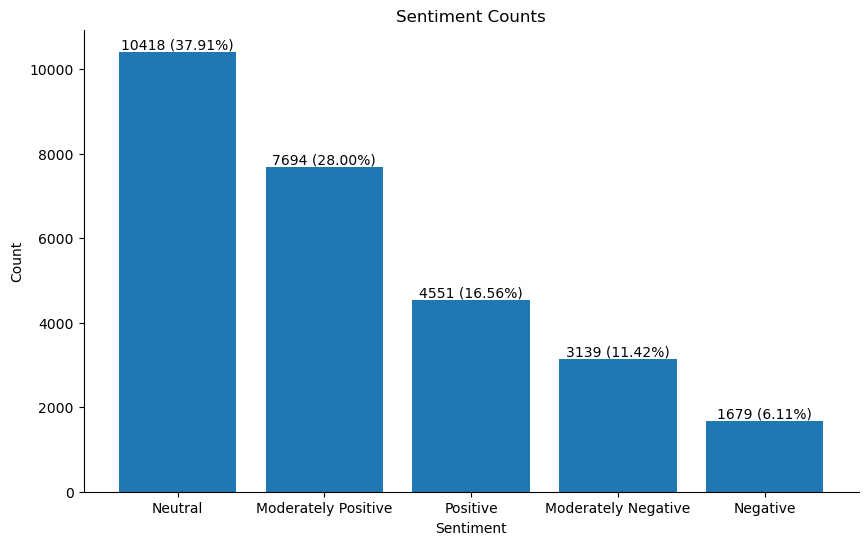

In [6]:
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment_textblob'].value_counts()
total_counts = sentiment_counts.sum()

# Calculate percentages
percentages = sentiment_counts / total_counts * 100

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.bar(sentiment_counts.index, sentiment_counts.values)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
ax.set_title("Sentiment Counts")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Add count values and percentages on top of each bar
for i, (count, percentage) in enumerate(zip(sentiment_counts.values, percentages.values)):
    ax.text(i, count, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')


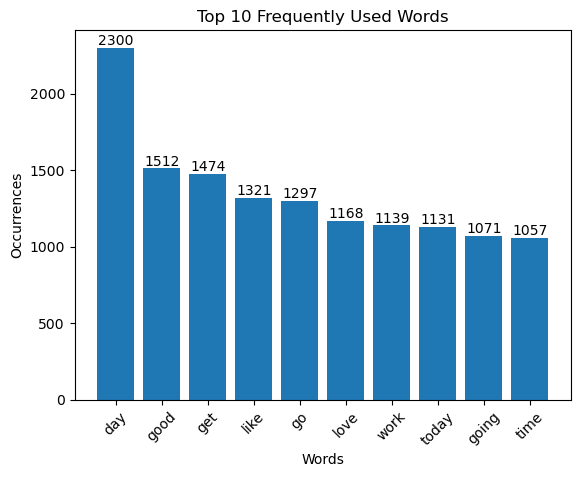

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all the clean_text values into a single string
words = " ".join(df['clean_text'].astype(str))

# Split the string into a list of words
words_list = words.split()

# Count the occurrences of each word
word_counts = Counter(words_list)

# Get the top 10 frequently used words
top_10_words = word_counts.most_common(10)

# Extract the words and their counts
words = [word for word, count in top_10_words]
counts = [count for word, count in top_10_words]

# Create a bar chart
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Top 10 Frequently Used Words')
plt.xticks(rotation=45)

# Display the value count on top of each bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

# Display the chart
plt.show()


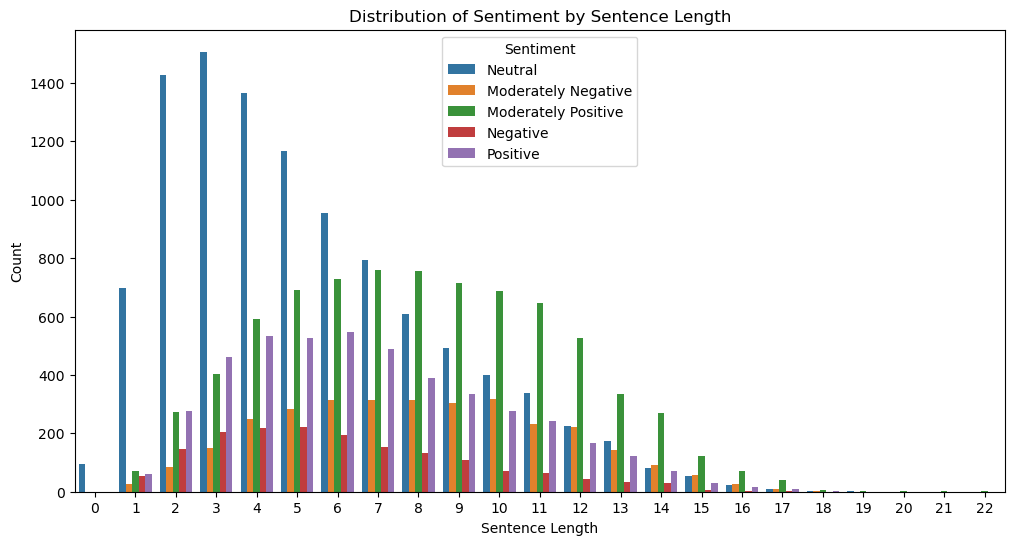

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each sentence
df['sentence_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Group the DataFrame by sentence lengths and sentiment categories
grouped_data = df.groupby(['sentence_length', 'sentiment_textblob']).size().reset_index(name='count')

# Plot the distribution using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='sentence_length', y='count', hue='sentiment_textblob', data=grouped_data)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Distribution of Sentiment by Sentence Length')
plt.legend(title='Sentiment')
plt.show()


In [9]:
# Define the sentiment categories
sentiment_categories = ['Negative', 'Moderately Negative', 'Neutral', 'Moderately Positive', 'Positive']

# Iterate over each sentiment category
for sentiment in sentiment_categories:
    # Filter the DataFrame for the specific sentiment category
    sentiment_df = df[df['sentiment_textblob'] == sentiment]
    
    # Combine all the clean_text values into a single string
    words = " ".join(sentiment_df['clean_text'].astype(str))
    
    # Split the string into a list of words
    words_list = words.split()
    
    # Count the occurrences of each word
    word_counts = Counter(words_list)
    
    # Get the top 10 frequently used words
    top_10_words = word_counts.most_common(10)
    
    # Display the sentiment category
    print(f"Sentiment: {sentiment}")
    
    # Display the top 10 words and their counts
    for word, count in top_10_words:
        print(f"- {word}: {count} occurrences")
    
    # Add a blank line between each sentiment category
    print()


Sentiment: Negative
- sorry: 195 occurrences
- hate: 191 occurrences
- bad: 188 occurrences
- sad: 172 occurrences
- sick: 121 occurrences
- like: 90 occurrences
- bored: 87 occurrences
- go: 85 occurrences
- get: 82 occurrences
- day: 80 occurrences

Sentiment: Moderately Negative
- get: 232 occurrences
- day: 225 occurrences
- sad: 199 occurrences
- like: 192 occurrences
- bad: 186 occurrences
- work: 185 occurrences
- tired: 171 occurrences
- sorry: 170 occurrences
- time: 159 occurrences
- go: 154 occurrences

Sentiment: Neutral
- go: 516 occurrences
- get: 509 occurrences
- day: 498 occurrences
- work: 452 occurrences
- going: 443 occurrences
- like: 418 occurrences
- back: 387 occurrences
- got: 366 occurrences
- today: 365 occurrences
- want: 350 occurrences

Sentiment: Moderately Positive
- day: 636 occurrences
- good: 607 occurrences
- new: 592 occurrences
- thanks: 548 occurrences
- love: 509 occurrences
- really: 499 occurrences
- much: 455 occurrences
- get: 454 occurrences

Sentiment: Negative


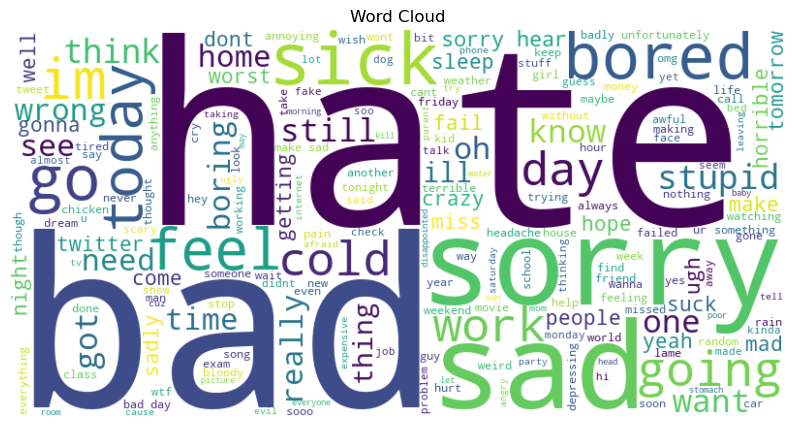


Sentiment: Moderately Negative


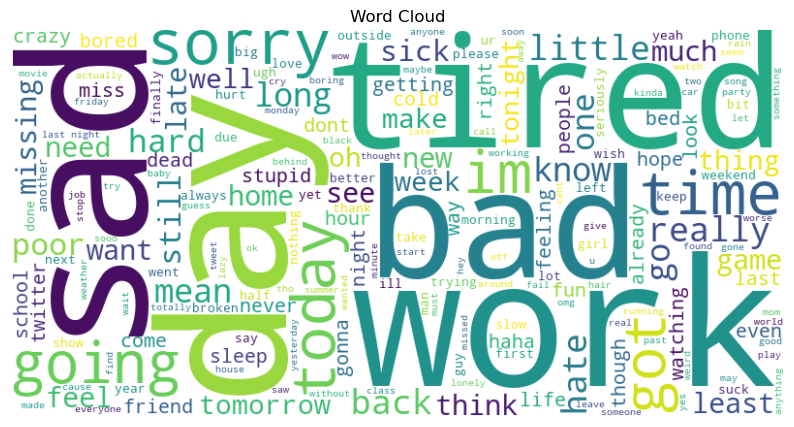


Sentiment: Neutral


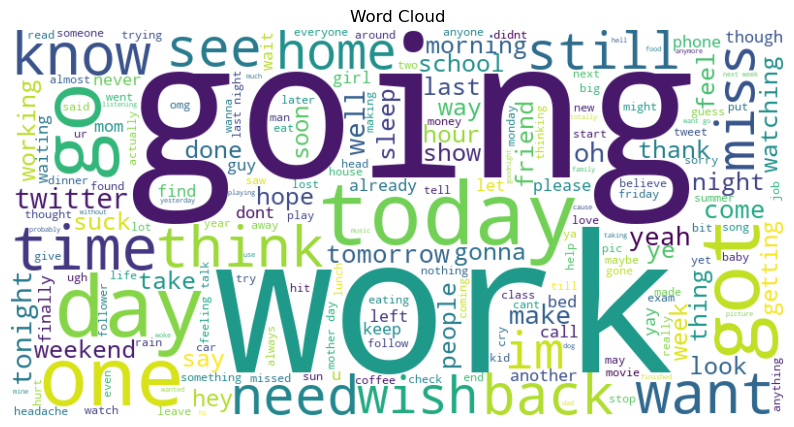


Sentiment: Moderately Positive


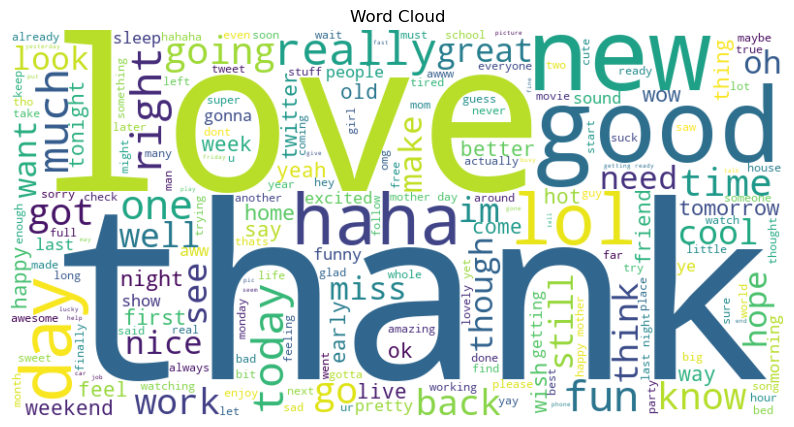


Sentiment: Positive


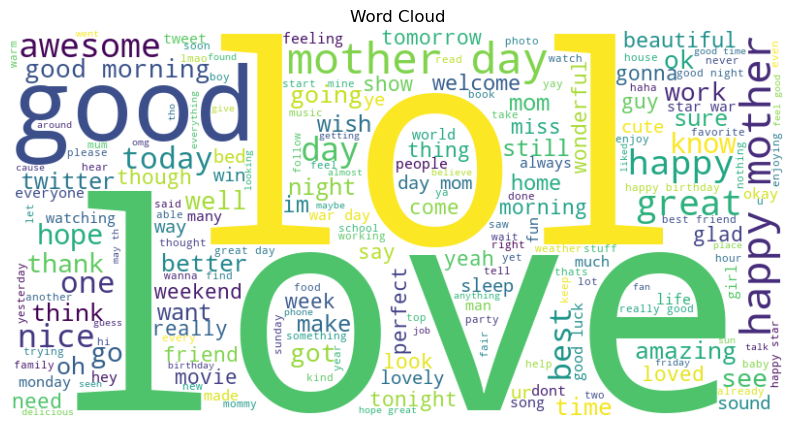

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the sentiment categories
sentiment_categories = ['Negative', 'Moderately Negative', 'Neutral', 'Moderately Positive', 'Positive']

# Iterate over each sentiment category
for sentiment in sentiment_categories:
    # Filter the DataFrame for the specific sentiment category
    sentiment_df = df[df['sentiment_textblob'] == sentiment]
    
    # Combine all the clean_text values into a single string
    words = " ".join(sentiment_df['clean_text'].astype(str))
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    # Display the sentiment category
    print(f"Sentiment: {sentiment}")
    
    # Create a plot for the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud')
    plt.axis('off')
    
    # Display the word cloud
    plt.show()
    
    # Add a blank line between each sentiment category
    print()


In [12]:
df.to_csv('output.csv', index=False)